In [ ]:
import networkx as nx
from thewalrus import hafnian
from tqdm import tqdm
import numpy as np
import random 
import matplotlib.pyplot as plt
import copy

# 设置全局字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({"font.size": 16})

# 启用 LaTeX 渲染
plt.rcParams["text.usetex"] = True
# Number of vertexes
n = 256

# @Shuo bipartite probablistic graph
# G4 = nx.complete_bipartite_graph(n//2, n//2)
random.seed(7)
G4 = nx.Graph()
# bipartitle nodes sets
left_nodes = range(n//2)
right_nodes = range(n//2, n)
# mark bipartite
G4.add_nodes_from(left_nodes, bipartite=0)
G4.add_nodes_from(right_nodes, bipartite=1)
# random generate edge
for u in left_nodes:
    for v in right_nodes:
        if random.random() < 0.2:
            G4.add_edge(u, v)
np.save("./Data/G4/G4_256.npy", nx.to_numpy_array(G4))

from Glauber_hafnian import *

print(calculate_density(G4))

12.76171875


100%|██████████| 10/10 [52:05<00:00, 312.60s/it]


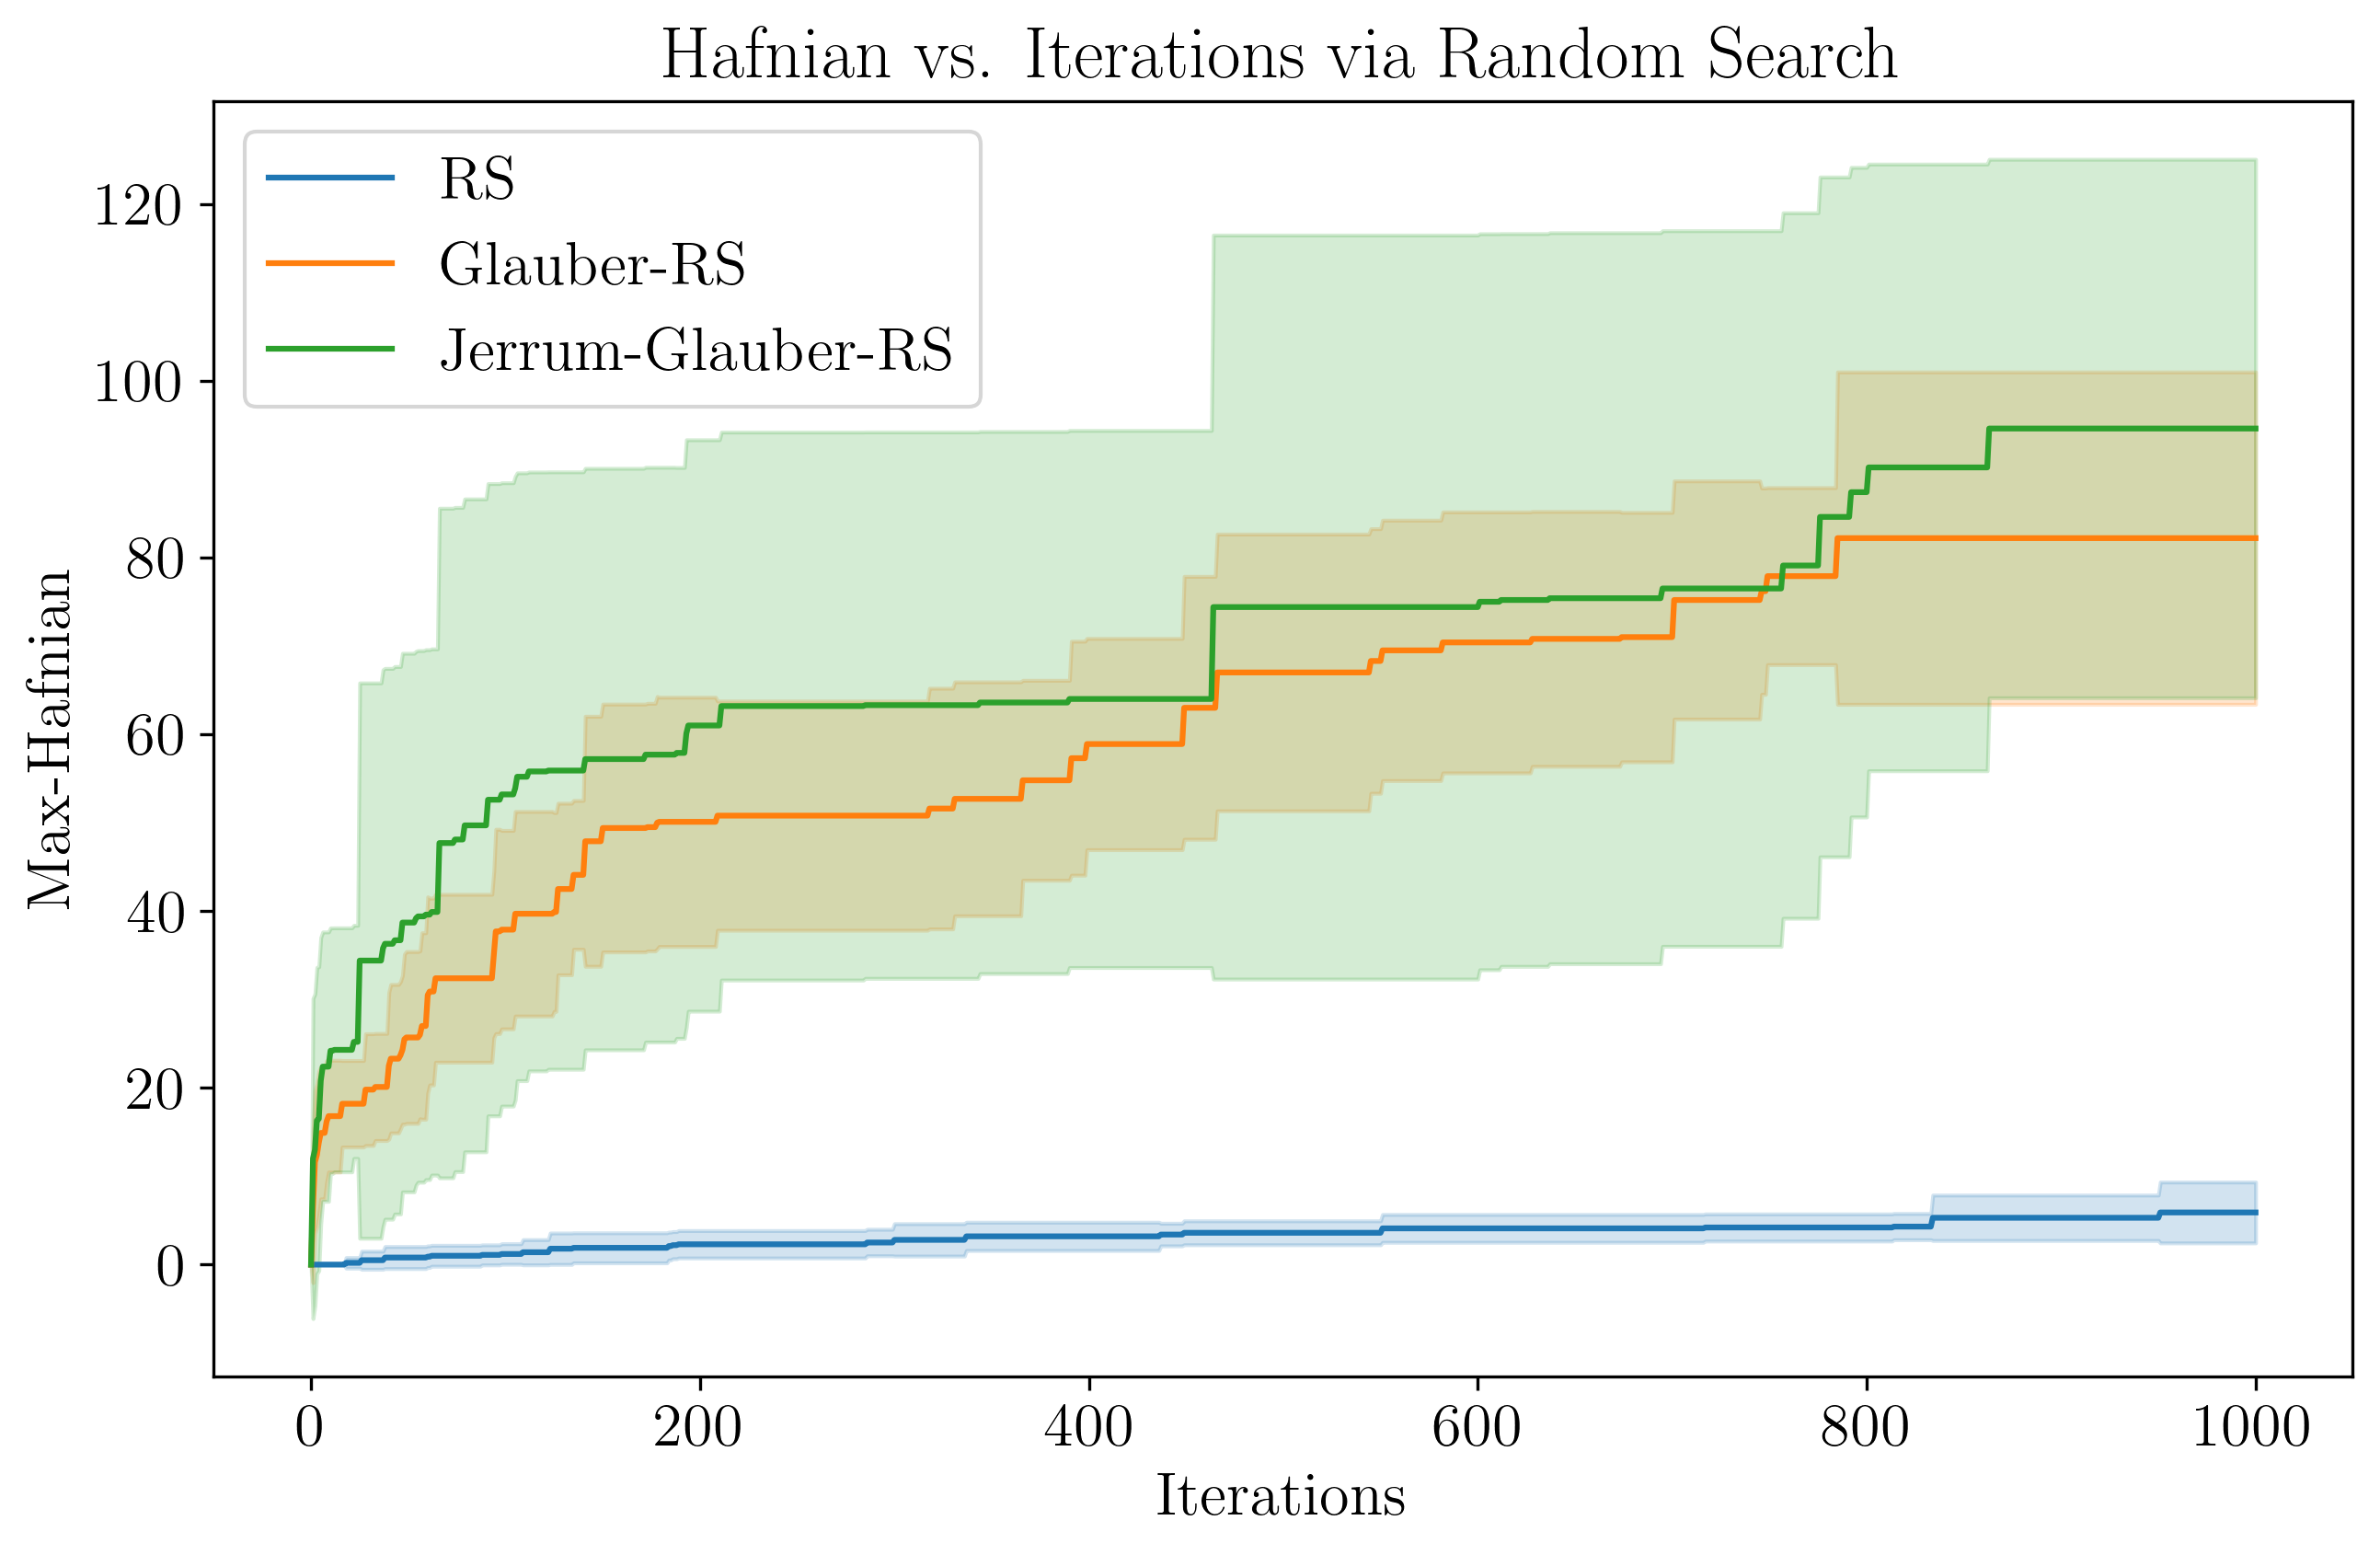

In [ ]:
# Plot the max-Hafnian values of the 16-node subgraph with the maximum Hafnian using Random Search
G = G4
c = 0.4 # fugacity
k = 16
iteration = 1000
mixing_time = 1000 # Hafnain mixing time 1000 x 1000
plt.figure(figsize=(10, 6), dpi=300)

# Finding the 16-node subgraph with the maximum Hafnian using Random Search
max_hafnian_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    max_hafnian_list[i], best_subgraph, best_hafnian = random_search(G, k, iteration)

# np.save("./Data/G4/RS_hafnian_list.npy", max_hafnian_list)
mean_hafnian_values = np.mean(max_hafnian_list, axis=0)
std_hafnian_values = np.std(max_hafnian_list, axis=0)

plt.plot(mean_hafnian_values, label="RS", color='C0')
plt.fill_between(range(iteration+1), mean_hafnian_values - std_hafnian_values, mean_hafnian_values + std_hafnian_values, color = 'C0', alpha=0.2)

# Finding the 16-node subgraph with the maximum Hafnian using Glauber Random Search
glauber_max_hafnian_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    glauber_max_hafnian_list[i], glauber_best_subgraph, glauber_best_hafnian = glauber_random_search(G, k, c, iteration, mixing_time)

np.save("./Data/G4/glauber_RS_hafnian_list.npy", glauber_max_hafnian_list)
mean_glauber_hafnian_values = np.mean(glauber_max_hafnian_list, axis=0)
std_glauber_hafnian_values = np.std(glauber_max_hafnian_list, axis=0)

plt.plot(mean_glauber_hafnian_values, label="Glauber-RS", color='C1')
plt.fill_between(range(iteration+1), mean_glauber_hafnian_values - std_glauber_hafnian_values, mean_glauber_hafnian_values + std_glauber_hafnian_values, color = 'C1', alpha=0.2)

# Finding the 16-node subgraph with the maximum Hafnian using Jerrum Glauber Random Search
jerrum_glauber_max_hafnian_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    jerrum_glauber_max_hafnian_list[i], jerrum_glauber_best_subgraph, jerrum_glauber_best_hafnian = jerrum_glauber_random_search(G, k, c, iteration, mixing_time)

np.save("./Data/G4/jerrum_glauber_RS_hafnian_list.npy", jerrum_glauber_max_hafnian_list)
mean_jerrum_glauber_hafnian_values = np.mean(jerrum_glauber_max_hafnian_list, axis=0)
std_jerrum_glauber_hafnian_values = np.std(jerrum_glauber_max_hafnian_list, axis=0)

plt.plot(mean_jerrum_glauber_hafnian_values, label="Jerrum-Glauber-RS", color='C2')
plt.fill_between(range(iteration+1), mean_jerrum_glauber_hafnian_values - std_jerrum_glauber_hafnian_values, mean_jerrum_glauber_hafnian_values + std_jerrum_glauber_hafnian_values, color = 'C2', alpha=0.2)
 
# Finding the 16-node subgraph with the maximum Hafnian using Quantum Inspired Random Search
quantum_inspired_max_hafnian_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    quantum_inspired_max_hafnian_list[i], quantum_inspired_best_subgraph, quantum_inspired_best_hafnian = quantum_inspired_random_search(G, k, iteration)

np.save(f"./Data/G4/quantum_inspired_RS_hafnian_list.npy", quantum_inspired_max_hafnian_list)
mean_quantum_inspired_hafnian_values = np.mean(quantum_inspired_max_hafnian_list, axis=0)
std_quantum_inspired_hafnian_values = np.std(quantum_inspired_max_hafnian_list, axis=0)

plt.plot(mean_quantum_inspired_hafnian_values, label="Quantum-Inspired-RS", color='C4')
plt.fill_between(range(iteration+1), mean_quantum_inspired_hafnian_values - std_quantum_inspired_hafnian_values, mean_quantum_inspired_hafnian_values + std_quantum_inspired_hafnian_values, color = 'C4', alpha=0.2)

# # Finding the 16-node subgraph with the maximum Hafnian using Double-Loop Glauber Random Search
# double_loop_glauber_max_hafnian_list = np.zeros((10, iteration+1))
# for i in tqdm(range(10)):
#     double_loop_glauber_max_hafnian_list[i], double_loop_glauber_best_subgraph, double_loop_glauber_best_hafnian = double_loop_glauber_random_search(G, k, c, iteration, mixing_time)
# 
# np.save("./Data/G4/double_loop_glauber_RS_hafnian_list.npy", double_loop_glauber_max_hafnian_list)
# mean_double_loop_glauber_hafnian_values = np.mean(double_loop_glauber_max_hafnian_list, axis=0)
# std_double_loop_glauber_hafnian_values = np.std(double_loop_glauber_max_hafnian_list, axis=0)
# 
# plt.plot(mean_double_loop_glauber_hafnian_values, label="Double-Loop-Glauber-RS", color='C3')
# plt.fill_between(range(iteration+1), mean_double_loop_glauber_hafnian_values - std_double_loop_glauber_hafnian_values, mean_double_loop_glauber_hafnian_values + std_double_loop_glauber_hafnian_values, color = 'C3', alpha=0.2)

plt.xlabel("Iterations")
plt.ylabel("Max-Hafnian")
plt.title("Hafnian vs. Iterations via Random Search")
plt.legend(loc = "upper left")
plt.savefig("./Figure/double_loop_hafnian_random_search.pdf")
plt.show()

100%|██████████| 10/10 [52:58<00:00, 317.82s/it]


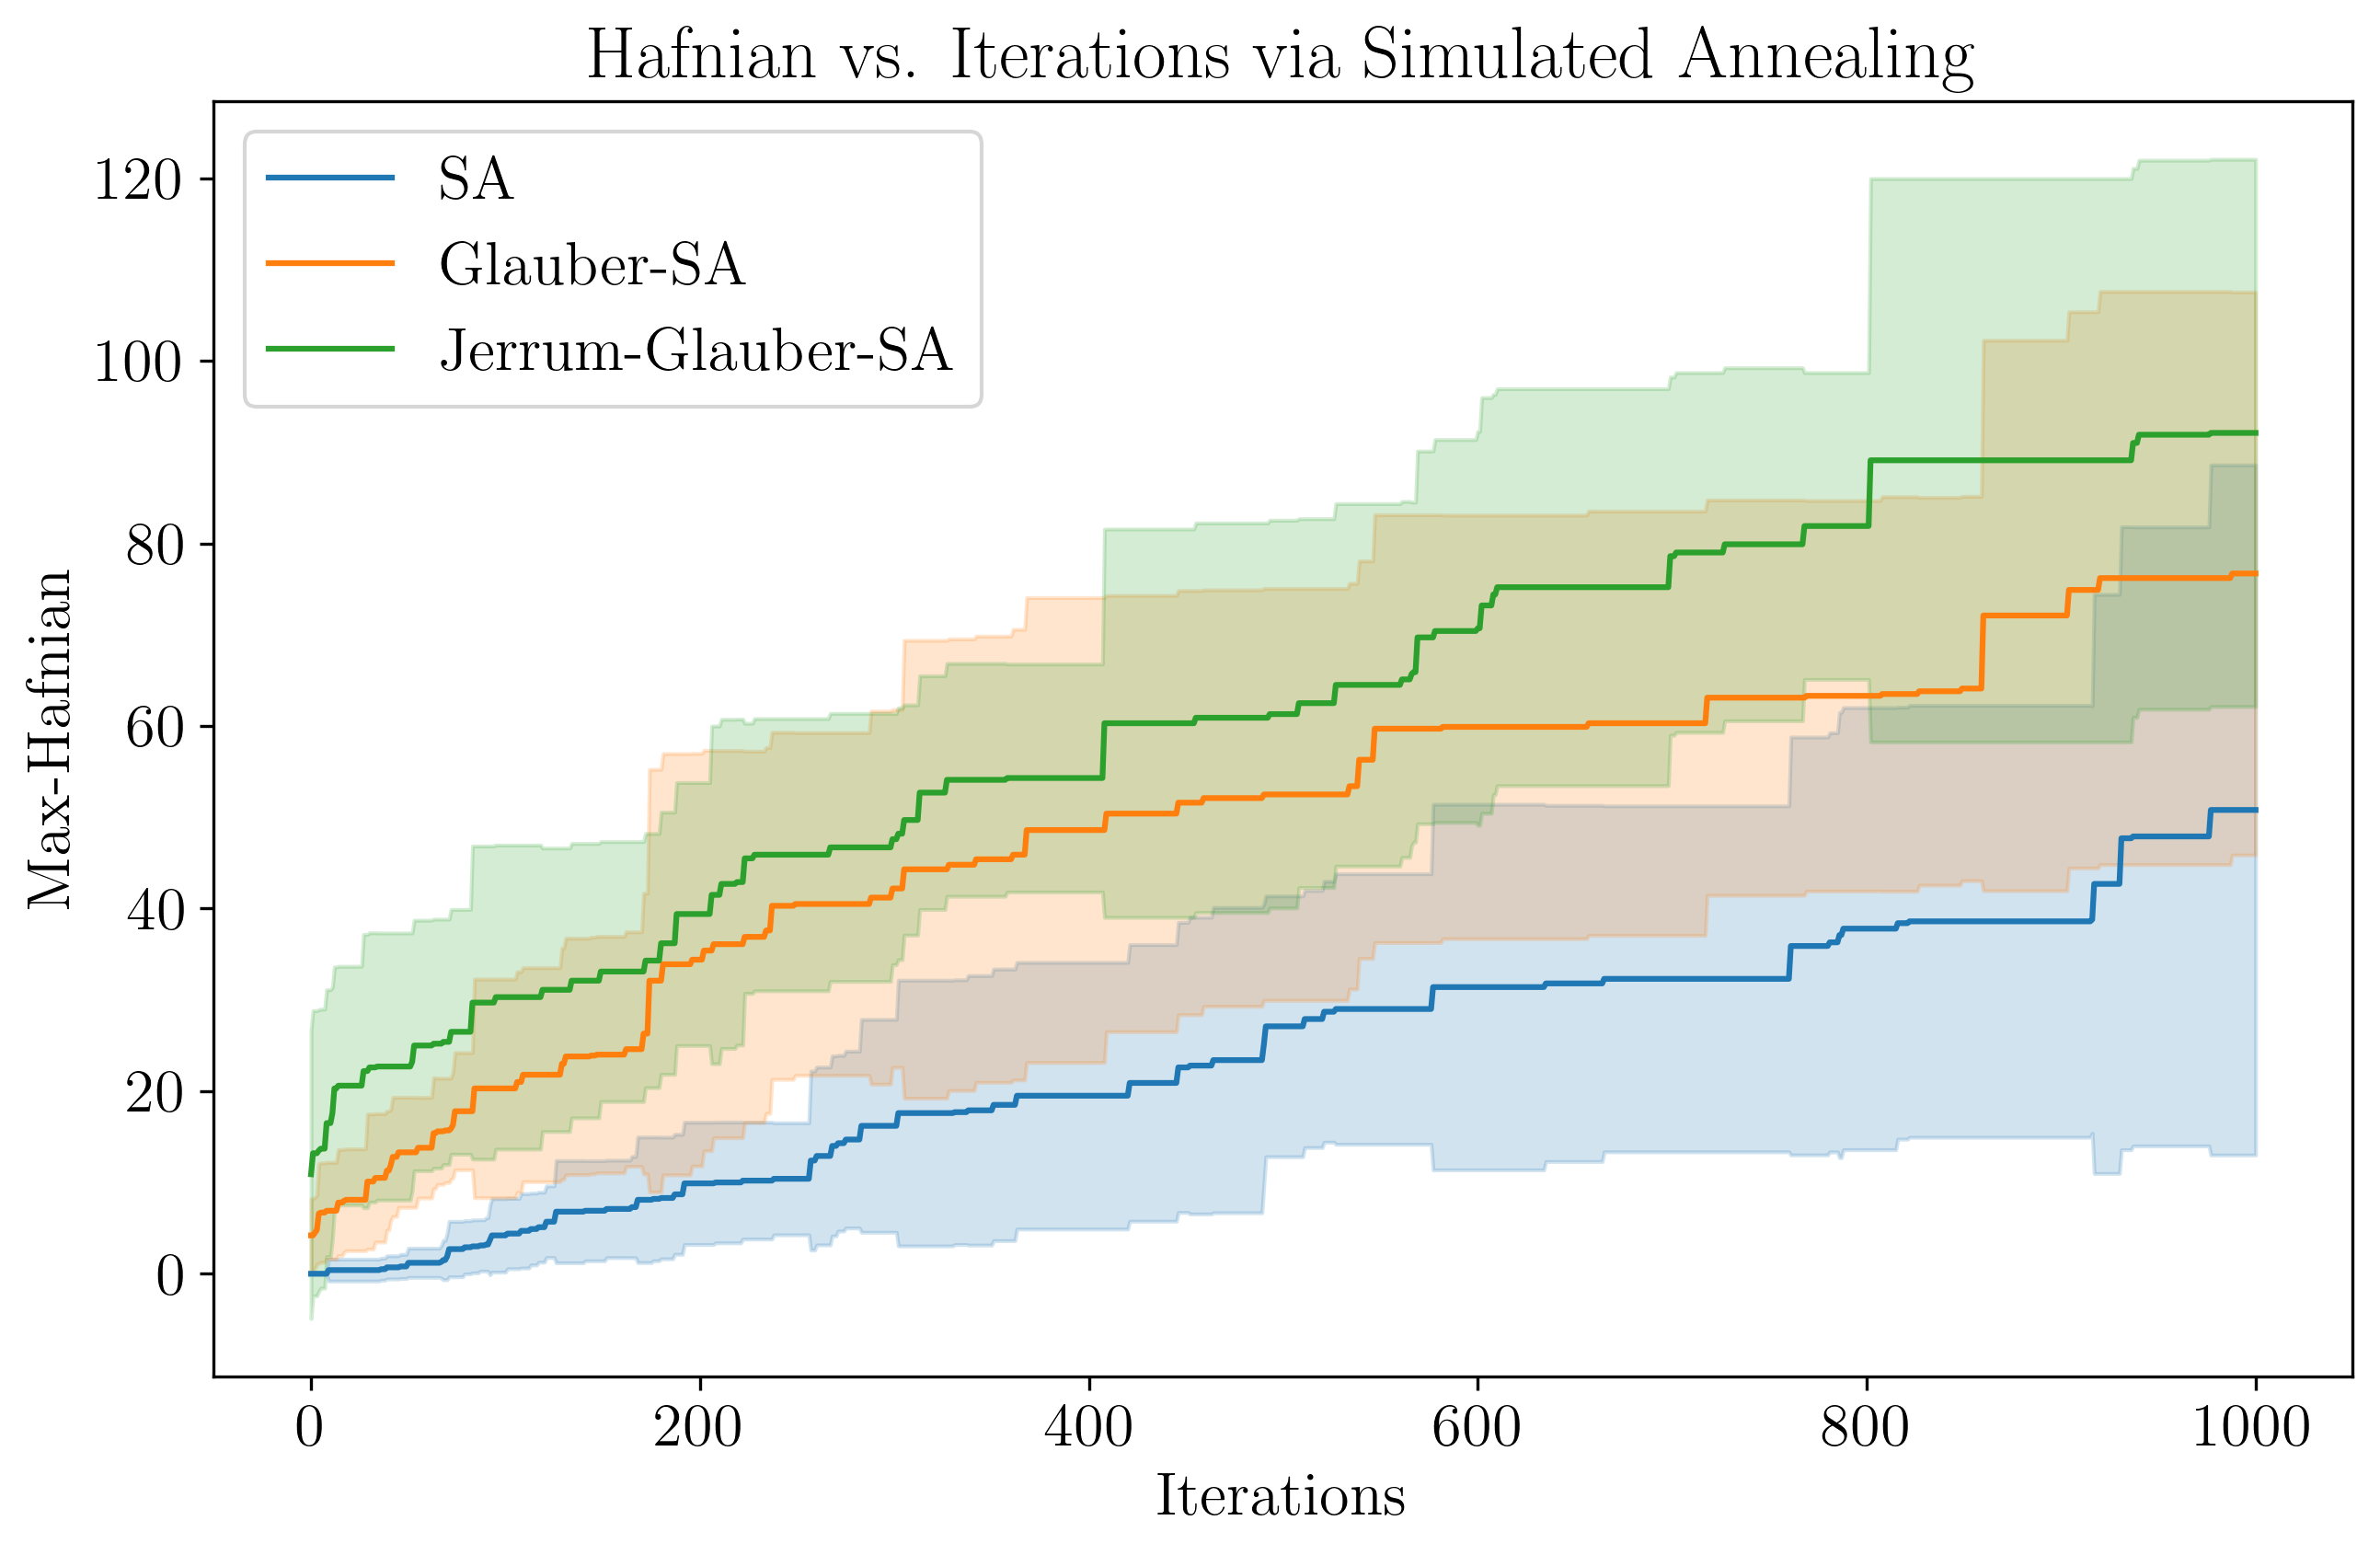

In [ ]:
# Plot the max-Hafnian values of the 16-node subgraph with the maximum Hafnian using Simulated Annealing
G = G4
c = 0.4 # fugacity
k = 16
iteration = 1000
mixing_time = 1000 # Hafnain mixing time 1000 x 1000
t_initial = 1.0
plt.figure(figsize=(10, 6), dpi=300)

# Finding the 16-node subgraph with the maximum Hafnian using Simulated Annealing
max_hafnian_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    max_hafnian_list[i], best_subgraph, best_hafnian = simulated_annealing(G, k, iteration, t_initial)

np.save("./Data/G4/SA_hafnian_list.npy", max_hafnian_list)
mean_hafnian_values = np.mean(max_hafnian_list, axis=0)
std_hafnian_values = np.std(max_hafnian_list, axis=0)

plt.plot(mean_hafnian_values, label="SA", color='C0')
plt.fill_between(range(iteration+1), mean_hafnian_values - std_hafnian_values, mean_hafnian_values + std_hafnian_values, color='C0', alpha=0.2)

# Finding the 16-node subgraph with the maximum Hafnian using Glauber Simulated Annealing
glauber_max_hafnian_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    glauber_max_hafnian_list[i], glauber_best_subgraph, glauber_best_hafnian = glauber_simulated_annealing(G, k, c, iteration, mixing_time, t_initial)

np.save("./Data/G4/glauber_SA_hafnian_list.npy", glauber_max_hafnian_list)
mean_glauber_hafnian_values = np.mean(glauber_max_hafnian_list, axis=0)
std_glauber_hafnian_values = np.std(glauber_max_hafnian_list, axis=0)

plt.plot(mean_glauber_hafnian_values, label="Glauber-SA", color='C1')
plt.fill_between(range(iteration+1), mean_glauber_hafnian_values - std_glauber_hafnian_values, mean_glauber_hafnian_values + std_glauber_hafnian_values, color = 'C1', alpha=0.2)

# Finding the 16-node subgraph with the maximum Hafnian using Jerrum Glauber Simulated Annealing
jerrum_glauber_max_hafnian_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    jerrum_glauber_max_hafnian_list[i], jerrum_glauber_best_subgraph, jerrum_glauber_best_hafnian = jerrum_glauber_simulated_annealing(G, k, c, iteration, mixing_time, t_initial)

np.save("./Data/G4/jerrum_glauber_SA_hafnian_list.npy", jerrum_glauber_max_hafnian_list)
mean_jerrum_glauber_hafnian_values = np.mean(jerrum_glauber_max_hafnian_list, axis=0)
std_jerrum_glauber_hafnian_values = np.std(jerrum_glauber_max_hafnian_list, axis=0)

plt.plot(mean_jerrum_glauber_hafnian_values, label="Jerrum-Glauber-SA", color='C2')
plt.fill_between(range(iteration+1), mean_jerrum_glauber_hafnian_values - std_jerrum_glauber_hafnian_values, mean_jerrum_glauber_hafnian_values + std_jerrum_glauber_hafnian_values, color = 'C2', alpha=0.2)

# Finding the 16-node subgraph with the maximum Hafnian using Quantum Inspired Simulated Annealing
quantum_inspired_max_hafnian_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    quantum_inspired_max_hafnian_list[i], quantum_inspired_best_subgraph, quantum_inspired_best_hafnian = quantum_inspired_simulated_annealing(G, k, iteration, t_initial)

np.save(f"./Data/G4/quantum_inspired_SA_hafnian_list.npy", quantum_inspired_max_hafnian_list)
mean_quantum_inspired_hafnian_values = np.mean(quantum_inspired_max_hafnian_list, axis=0)
std_quantum_inspired_hafnian_values = np.std(quantum_inspired_max_hafnian_list, axis=0)

plt.plot(mean_quantum_inspired_hafnian_values, label="Quantum-Inspired-SA", color='C4')
plt.fill_between(range(iteration+1), mean_quantum_inspired_hafnian_values - std_quantum_inspired_hafnian_values, mean_quantum_inspired_hafnian_values + std_quantum_inspired_hafnian_values, color = 'C4', alpha=0.2)
         
# # Finding the 16-node subgraph with the maximum Hafnian using Double-Loop Glauber Simulated Annealing
# double_loop_glauber_max_hafnian_list = np.zeros((10, iteration+1))
# for i in tqdm(range(10)):
#     double_loop_glauber_max_hafnian_list[i], double_loop_glauber_best_subgraph, double_loop_glauber_best_hafnian = double_loop_glauber_simulated_annealing(G, k, c, iteration, mixing_time, t_initial)
# 
# np.save("./Data/G4/double_loop_glauber_SA_hafnian_list.npy", double_loop_glauber_max_hafnian_list)
# mean_double_loop_glauber_hafnian_values = np.mean(double_loop_glauber_max_hafnian_list, axis=0)
# std_double_loop_glauber_hafnian_values = np.std(double_loop_glauber_max_hafnian_list, axis=0)
# 
# plt.plot(mean_double_loop_glauber_hafnian_values, label="Double-Loop-Glauber-SA", color='C3')
# plt.fill_between(range(iteration+1), mean_double_loop_glauber_hafnian_values - std_double_loop_glauber_hafnian_values, mean_double_loop_glauber_hafnian_values + std_double_loop_glauber_hafnian_values, color = 'C3', alpha=0.2)


plt.xlabel("Iterations")
plt.ylabel("Max-Hafnian")
plt.title("Hafnian vs. Iterations via Simulated Annealing")
plt.legend(loc = "upper left")
plt.savefig("./Figure/double_loop_hafnian_simulated_annealing.pdf")
plt.show()